In [1]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import openpyxl
from codelib.plotting import dist_vs_normal_plot, volume_contribution_plot, DefaultStyle, default_colors

sns.set_theme("paper","whitegrid")
DefaultStyle()


In [2]:
spy_returns = pd.read_excel("spy_returns_train.xlsx", engine = "openpyxl")
spy_prices  = pd.read_excel("spy_prices_train.xlsx", engine = "openpyxl")
spy_prices = spy_prices.set_index("Date", drop = True)
spy_returns = spy_returns.set_index("Date", drop = True)

In [3]:
test_data

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


In [5]:
test_data = pd.read_parquet('ef805fd82ff54fadb363094e3b122ab9.parquet', engine='pyarrow')
test_data
spy_prices = test_data[["time_id", "price"]]
spy_returns = spy_prices["price"] / spy_prices["price"].shift() - 1

## Prices and returns

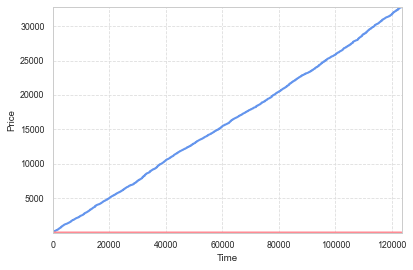

In [8]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(spy_prices)
ax.set(xlabel = "Time", ylabel = "Price")
fig.tight_layout()
#plt.savefig("plots/spy500_train_prices.png")

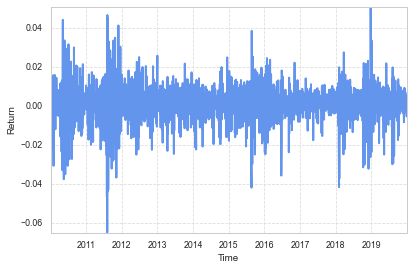

In [13]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(spy_returns)
ax.set(xlabel = "Time", ylabel = "Return")
fig.tight_layout()
plt.savefig("plots/spy500_train_returns.png")

## Autocorrel of returns

In [17]:
import statsmodels.api as sm

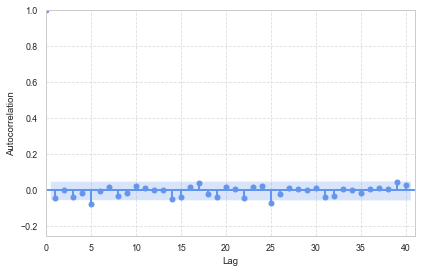

In [51]:
fig, ax = plt.subplots( figsize = (6, 4))
#pd.plotting.autocorrelation_plot(spy_returns, ax = ax, alpha = 0.75)
sm.graphics.tsa.plot_acf(spy_returns, lags = 40, ax = ax, alpha = 0.01)
fig.tight_layout()
ax.set(xlim = (0, 41), ylim = (-0.25, None), title = None, 
      xlabel = "Lag", ylabel = "Autocorrelation")
#vol_clust_name = "sp500_autocorrel"
#plt.savefig(f"plots/{vol_clust_name}.png")

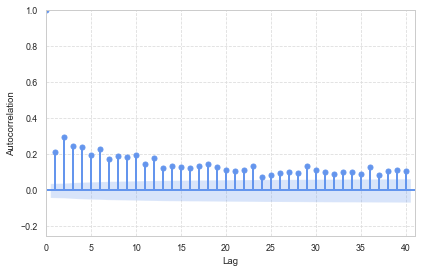

In [50]:
fig, ax = plt.subplots( figsize = (6, 4))
#pd.plotting.autocorrelation_plot(spy_returns, ax = ax, alpha = 0.75)
sm.graphics.tsa.plot_acf(abs(spy_returns), lags = 40, ax = ax, alpha = 0.05)
fig.tight_layout()
ax.set(xlim = (0, 41), ylim = (-0.25, None), title = None, 
      xlabel = "Lag", ylabel = "Autocorrelation")
#vol_clust_name_abs = "sp500_autocorrel_abs"
#plt.savefig(f"plots/{vol_clust_name_abs}.png")

## Heavy Tails


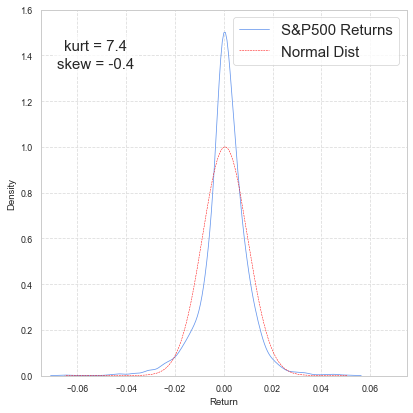

In [7]:
fig, ax = plt.subplots(figsize = (6, 6))
dist_vs_normal_plot(spy_returns, ax = ax, return_label = "S&P500 Returns")
#dist_vs_normal(pd.DataFrame(all_stacked_returns), ax = ax)
ax.set(xlim = (-0.075, 0.075))
fig.tight_layout()
#heavy_name = "sp500_train_heavy"
#plt.savefig(f"plots/{heavy_name}.png")